In [1]:
ACCESS_TOKEN = "vk1.a.TULBp4bzOCAexnhN0-9_ZaUPcxPhj-3qve-BCHCKS_pNNpHaryFdyyF3WihW-SFFpYxTxXyw3IHxLK8mQtjPTFmg7QGxCQFEC0lNrdOLZ1Se-gNWF44Vdx4YoLA1os56YlAxrYhs2b9fTOne0QKPyvhKHXHKXoyeqo5STFOJGRmUqPiIgj4RCSfTM-rq5yud"

In [ ]:
import requests
import json
 
USER_ID = None                   
API_VERSION = "5.199"             

FIELDS = "bdate,city,domain,photo_200,about" 
# Параметры для запроса users.get
params = {
    "access_token": ACCESS_TOKEN,
    "v": API_VERSION,
    "fields": FIELDS,
}
# Если указан конкретный user_id, то добавляем его в запрос
if USER_ID is not None:
    params["user_ids"] = USER_ID
# Запрос к методу users.get
response = requests.get("https://api.vk.com/method/users.get", params=params)

print("HTTP статус:", response.status_code)

data = response.json() # Разбираем ответ как json

print("Сырой JSON-ответ от VK:")
print(json.dumps(data, ensure_ascii=False, indent=4))

# Если в ответе есть поле response, то ошибок нет
if "response" in data:
    user = data["response"][0]
    print("\nРазобранные поля пользователя:")
    print("ID:", user.get("id"))
    print("Имя:", user.get("first_name"))
    print("Фамилия:", user.get("last_name"))
    print("Дата рождения:", user.get("bdate"))
    
    # city - вложенный объект с полями id и title
    city = user.get("city")
    if city:
        print("Город:", city.get("title"))
    else:
        print("Город: не указан")
else:
    # Если нет response, то ошибка
    print("\nОшибка VK API:")
    print(data.get("error"))


HTTP статус: 200
Сырой JSON-ответ от VK:
{
    "response": [
        {
            "id": 383462735,
            "domain": "ksvyatogorova",
            "bdate": "9.3.2005",
            "photo_200": "https://sun1-88.userapi.com/s/v1/ig2/DLakuOE_d-prVxeypNkVyn--MWy9zvy0izGU5uxb13ag5fgrM0Bmt_hbm4IfF636-ssDMK7SJmyyI0D6iRuH9QgL.jpg?quality=95&crop=1,361,1919,1919&as=32x32,48x48,72x72,108x108,160x160,240x240,360x360,480x480,540x540,640x640,720x720,1080x1080,1280x1280,1440x1440&ava=1&cs=200x200",
            "about": "",
            "first_name": "Ксения",
            "last_name": "Святогорова",
            "can_access_closed": true,
            "is_closed": false
        }
    ]
}

Разобранные поля пользователя:
ID: 383462735
Имя: Ксения
Фамилия: Святогорова
Дата рождения: 9.3.2005
Город: не указан


In [ ]:
import requests
import pandas as pd

API_VERSION = "5.199"
FRIENDS_FIELDS = "city,domain,universities,schools,occupation,photo_100"
# Параметры для friends.get (если не передаём user_id, берётся владелец токена)
params = {
    "access_token": ACCESS_TOKEN,
    "v": API_VERSION,
    "fields": FRIENDS_FIELDS,
    "count": 5000, # максимально возможное количество друзей за один запрос
}
# запрашиваем список друзей
resp = requests.get("https://api.vk.com/method/friends.get", params=params)
data = resp.json()

print("HTTP статус:", resp.status_code)
print("Есть ли ошибка VK:", data.get("error"))

# достаем список друзей из ответа
friends = data.get("response", {}).get("items", [])
print("Всего друзей:", len(friends))

# превращаем список словарей в датафрэйм
friends_df = pd.json_normalize(friends)
friends_df.head()

HTTP статус: 200
Есть ли ошибка VK: None
Всего друзей: 150


,id,domain,universities,schools,track_code,photo_100,first_name,last_name,can_access_closed,is_closed,city.id,city.title,occupation.id,occupation.name,occupation.type,occupation.graduate_year,occupation.city_id,lists
0,1840863,id1840863,"[{'chair': 158816, 'chair_name': 'Медицины и б...","[{'city': 1077, 'class': 'б', 'class_id': 2, '...",fdb3526bHdWL4YvVRG6rFPP7OI0L3OsoHKpHFi4A0bS2d3...,https://sun1-24.userapi.com/s/v1/ig2/s9OrmdCwh...,Марина,Ермакова,True,False,1.0,Москва,62258607.0,Университет МИСИС,work,NaN,NaN,NaN
1,1890364,bifidka,[],"[{'city': 40, 'class': 'а', 'class_id': 1, 'id...",d9d27d101ykJR25XAG6dJCqxSu2izUYHExnqOw4N5-kGm1...,https://sun1-19.userapi.com/s/v1/ig1/Q3mE7T5ZA...,Ольга,Алексевна,True,False,1.0,Москва,NaN,НИТУ МИСИС,work,NaN,NaN,NaN
2,2785883,id2785883,NaN,NaN,f30b554dwiHHC9qbDmuD1oCxEFrXqH3DgZWooXbUun89Oz...,https://sun1-25.userapi.com/s/v1/ig2/Afw6KJUAI...,Марина Владимировна,Титова,True,False,1.0,Москва,289.0,МПГУ (бывш. МГПИ им. Ленина),university,1984.0,1.0,NaN
3,3874930,maria.gavrilina,"[{'chair': 6813, 'chair_name': 'Кафедра русско...","[{'city': 158, 'class': '', 'class_id': 0, 'id...",e109f0d8tUcziUiSZg3J4E0Aht4mJVgd7nK78AJPGCjyLI...,https://sun1-56.userapi.com/s/v1/ig1/mKz2Ie8Nb...,Мария,Гаврилина,True,False,1057953.0,Пушкино,NaN,Репетитор по русскому языку и литературе,work,NaN,NaN,NaN
4,4782485,vkurenkov1982,"[{'chair': 2140, 'chair_name': 'Информатики и ...","[{'city': 1, 'class': '', 'class_id': 0, 'id':...",977c1623jGMxueysgHbOkijPFeXaovvt2GwWIq_0co-uWQ...,https://sun1-56.userapi.com/s/v1/ig2/eCdNv00m6...,Владимир,Куренков,True,False,1.0,Москва,132.0,НИУ ВШЭ,work,NaN,NaN,NaN


In [ ]:
# Человеческое название города (если city.title пустой, то "Не указан")
friends_df["city_title"] = friends_df["city.title"].fillna("Не указан")

# Полное имя друга: Имя + Фамилия
friends_df["full_name"] = friends_df["first_name"] + " " + friends_df["last_name"]

# Название места работы/учёбы, если есть
friends_df["occupation_name"] = friends_df["occupation.name"].fillna("Не указано")

# Смотрим несколько строк для проверки
friends_df[["id", "full_name", "city_title", "occupation_name"]].head()

,id,full_name,city_title,occupation_name
0,1840863,Марина Ермакова,Москва,Университет МИСИС
1,1890364,Ольга Алексевна,Москва,НИТУ МИСИС
2,2785883,Марина Владимировна Титова,Москва,МПГУ (бывш. МГПИ им. Ленина)
3,3874930,Мария Гаврилина,Пушкино,Репетитор по русскому языку и литературе
4,4782485,Владимир Куренков,Москва,НИУ ВШЭ


In [ ]:
# Считаем сколько друзей в каждом городе
city_stats = (
    friends_df
    .groupby("city_title")
    .size()
    .reset_index(name="friends_count")
    .sort_values("friends_count", ascending=False)
)

city_stats.head()

,city_title,friends_count
11,Москва,72
13,Не указан,55
22,Челябинск,2
0,Barcelona,1
21,Ульяновск,1


In [13]:
city_stats.to_csv("friends_by_city.csv", index=False, encoding="utf-8")
print("Файл friends_by_city.csv сохранён в текущей папке.")

Файл friends_by_city.csv сохранён в текущей папке.


In [ ]:
import networkx as nx
import time

# Ограничиваемся первыми N друзьями, чтобы граф не был слишком огромным
MAX_FRIENDS_FOR_GRAPH = 50
friends_subset = friends_df.head(MAX_FRIENDS_FOR_GRAPH).copy()

# Создаём пустой неориентированный граф
G = nx.Graph()

# Добавляем в граф узлы — друзей
for _, row in friends_subset.iterrows():
    G.add_node(
        row["id"],              
        label=row["full_name"],  
        city=row["city_title"], 
        occupation=row["occupation_name"] 
    )

# Множество ID друзей в подвыборке 
subset_ids = set(friends_subset["id"])

def get_friends_ids(user_id):
    """
    Вспомогательная функция: возвращает список ID друзей для заданного user_id.
    Если VK вернул ошибку — печатаем её и возвращаем пустой список.
    """
    params = {
        "access_token": ACCESS_TOKEN,
        "v": API_VERSION,
        "user_id": user_id,
    }
    r = requests.get("https://api.vk.com/method/friends.get", params=params)
    d = r.json()
    if "response" in d:
        return d["response"]["items"]
    else:
        print("Ошибка при friends.get для user_id =", user_id, d.get("error"))
        return []

# Для каждого друга из подвыборки запрашиваем его друзей
# и добавляем рёбра между теми, кто тоже попал в нашу подвыборку
for uid in subset_ids:
    friend_ids = set(get_friends_ids(uid))
    # Оставляем только тех друзей, которые есть в subset_ids (пересечение множеств)
    mutual_in_subset = friend_ids & subset_ids

    # Условие uid < other_id нужно, чтобы не дублировать рёбра
    for other_id in mutual_in_subset:
        if uid < other_id:
            G.add_edge(uid, other_id)

    # Пауза, чтобы не попасть под flood control VK
    time.sleep(0.2)

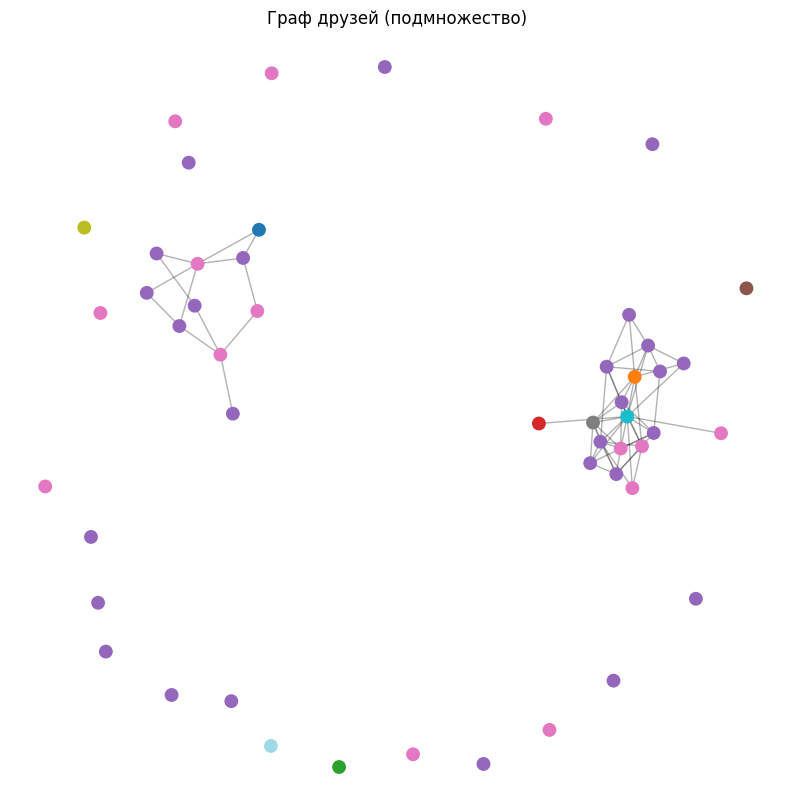

In [ ]:
import matplotlib.pyplot as plt

# Размер окна для отрисовки
plt.figure(figsize=(10, 10))

# Раскладка узлов графа
pos = nx.spring_layout(G, k=0.3, seed=42)

# Берём список городов для всех узлов
cities = [G.nodes[n]["city"] for n in G.nodes()]

# Уникальные города и их "ID цвета"
unique_cities = list(sorted(set(cities)))
city_to_color_id = {c: i for i, c in enumerate(unique_cities)}

# Для каждого узла определяем номер цвета по его городу
node_colors = [city_to_color_id[c] for c in cities]

# Рисуем узлы (цвет = город)
nx.draw_networkx_nodes(
    G,
    pos,
    node_size=80,
    node_color=node_colors,
    cmap="tab20"
)

# Рисуем рёбра
nx.draw_networkx_edges(G, pos, alpha=0.3)

plt.title("Граф друзей (подмножество)")
plt.axis("off")  # убираем оси
plt.show()

In [23]:
import community.community_louvain as community_louvain

partition = community_louvain.best_partition(G)

import networkx as nx

nx.set_node_attributes(G, partition, "cluster")
friends_subset["cluster"] = friends_subset["id"].map(partition)

friends_subset[["id", "full_name", "city_title", "occupation_name", "cluster"]].head()

,id,full_name,city_title,occupation_name,cluster
0,1840863,Марина Ермакова,Москва,Университет МИСИС,0
1,1890364,Ольга Алексевна,Москва,НИТУ МИСИС,24
2,2785883,Марина Владимировна Титова,Москва,МПГУ (бывш. МГПИ им. Ленина),2
3,3874930,Мария Гаврилина,Пушкино,Репетитор по русскому языку и литературе,3
4,4782485,Владимир Куренков,Москва,НИУ ВШЭ,24


In [24]:
cluster_summary = (
    friends_subset
    .groupby("cluster")
    .agg(
        friends_count=("id", "count"),
        top_city=("city_title", lambda s: s.value_counts().index[0] if len(s) else None),
        top_occupation=("occupation_name", lambda s: s.value_counts().index[0] if len(s) else None),
    )
    .reset_index()
)

cluster_summary

,cluster,friends_count,top_city,top_occupation
0,0,1,Москва,Университет МИСИС
1,1,1,Derry,Не указано
2,2,1,Москва,МПГУ (бывш. МГПИ им. Ленина)
3,3,1,Пушкино,Репетитор по русскому языку и литературе
4,4,10,Москва,Не указано
5,5,1,Москва,Движение Первых
6,6,9,Москва,НИТУ МИСИС
7,7,1,Не указан,Не указано
8,8,1,Москва,РГГУ
9,9,1,Москва,"Центр ""Притяжение"" (Хорошево-Мневники, СЗАО)"


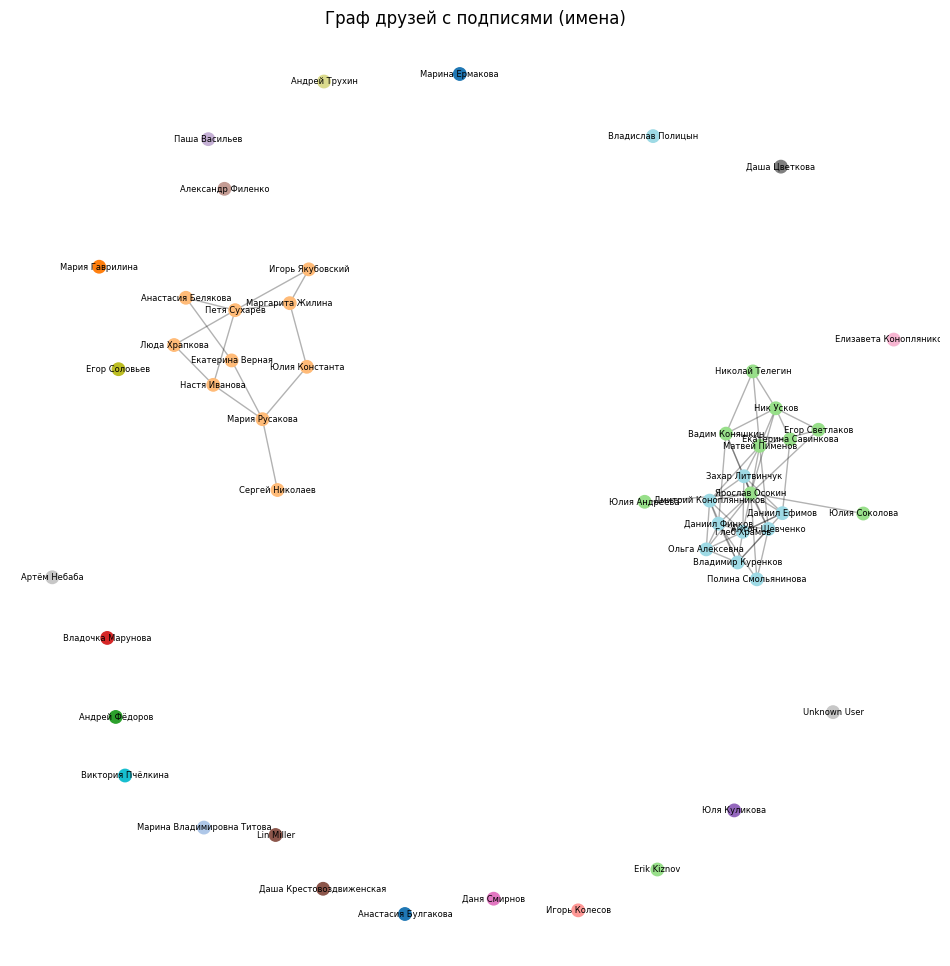

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.3, seed=42)

clusters = [G.nodes[n]["cluster"] for n in G.nodes()]
unique_clusters = sorted(set(clusters))
cluster_to_color_id = {c: i for i, c in enumerate(unique_clusters)}
node_colors = [cluster_to_color_id[c] for c in clusters]

nx.draw_networkx_nodes(G, pos, node_size=80, node_color=node_colors, cmap="tab20")
nx.draw_networkx_edges(G, pos, alpha=0.3)

# Подписи узлов (имена пользователей)
labels = {n: G.nodes[n]["label"] for n in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=6) 

plt.title("Граф друзей с подписями (имена)")
plt.axis("off")
plt.show()

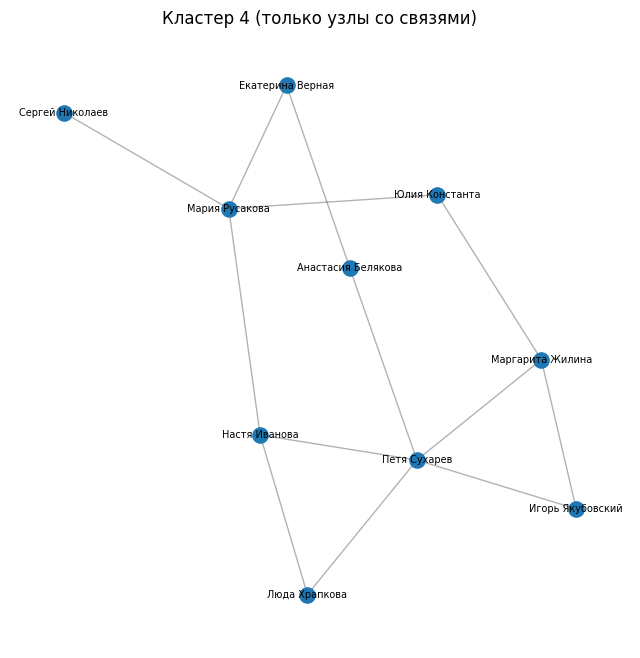

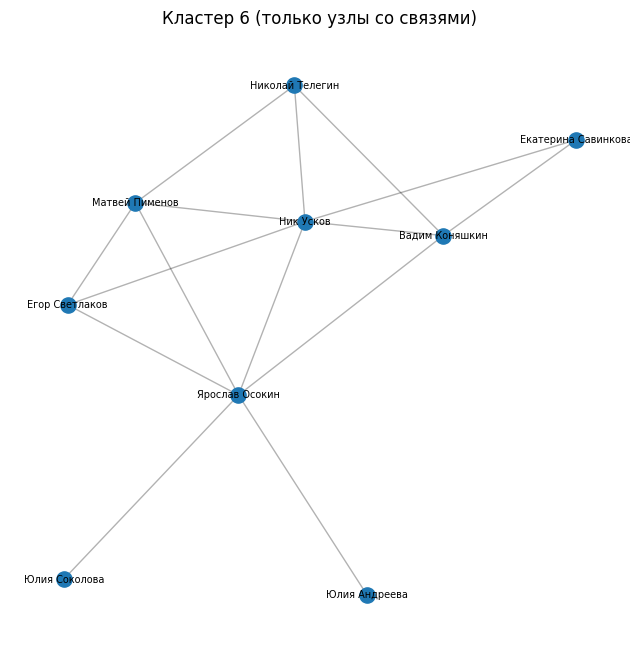

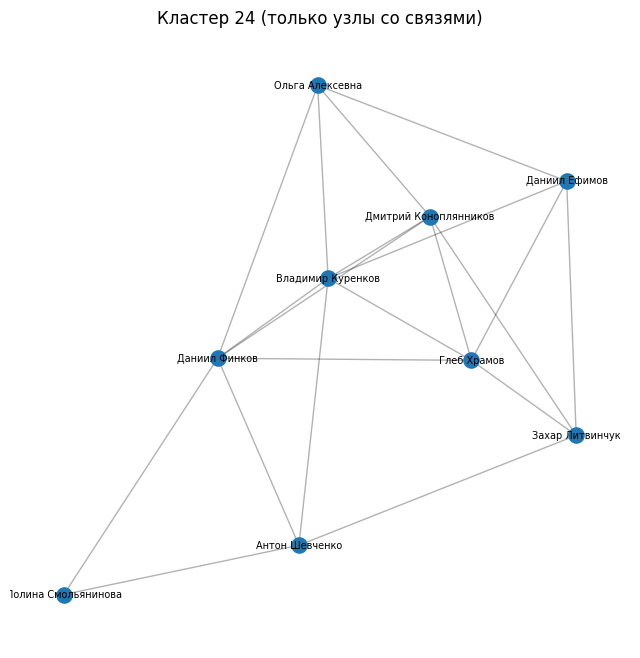

In [ ]:
import matplotlib.pyplot as plt

nodes_with_edges = [n for n in G.nodes() if G.degree[n] > 0]
G_connected = G.subgraph(nodes_with_edges)

clusters_ids = sorted({G_connected.nodes[n]["cluster"] for n in G_connected.nodes()})

for cl in clusters_ids:
    nodes_cl = [n for n in G_connected.nodes() if G_connected.nodes[n]["cluster"] == cl]
    H = G_connected.subgraph(nodes_cl)

    if H.number_of_edges() == 0:
        continue

    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(H, k=0.3, seed=42)

    nx.draw_networkx_nodes(H, pos, node_size=120)
    nx.draw_networkx_edges(H, pos, alpha=0.3)

    labels = {n: H.nodes[n]["label"] for n in H.nodes()}
    nx.draw_networkx_labels(H, pos, labels, font_size=7)

    plt.title(f"Кластер {cl} (только узлы со связями)")
    plt.axis("off")
    plt.show()

## Анализ кластеров друзей

На основании алгоритма кластеризации графа друзей было выделено несколько кластеров.

- Кластер 0 — N человек, чаще всего город X, основное место работы/учёбы Y. 
  Предполагаю, что это друзья по работе / университету.

- Кластер 1 — M человек, также в основном из города Z, часто встречается школа/университет W. 
  Вероятно, это одноклассники / одногруппники.

- Кластер 2 — K человек, города более разнообразные, единое место работы/учёбы не выделяется. 
  Можно предположить, что это друзья по хобби / интернет-сообществам.

https://datalens.yandex/3m2g2y9q3eo0o

Карта друзей по городам

In [ ]:
import requests
import pandas as pd

API_VERSION = "5.199"
CITY_NAME = "Краснодар"
COUNTRY_ID = 1              # 1 = Россия

params = {
    "access_token": ACCESS_TOKEN,
    "v": API_VERSION,
    "country_id": COUNTRY_ID,
    "q": CITY_NAME,
    "need_all": 0,
    "count": 10,
}

resp = requests.get("https://api.vk.com/method/database.getCities", params=params)
data = resp.json()
data

{'response': {'count': 10,
  'items': [{'id': 72, 'title': 'Краснодар', 'region': 'Краснодарский край'},
   {'id': 1023973,
    'title': 'Краснодар',
    'area': 'Богучарский район',
    'region': 'Воронежская область'},
   {'id': 1041247,
    'title': 'Краснодарский',
    'area': 'Красноармейский район',
    'region': 'Краснодарский край'},
   {'id': 1091932,
    'title': 'Краснодарский',
    'area': 'Новоалександровский район',
    'region': 'Ставропольский край'},
   {'id': 1041306,
    'title': 'Учебное Хозяйство Краснодарское',
    'area': 'Краснодар',
    'region': 'Краснодарский край'},
   {'id': 1500206,
    'title': 'Краснодарка',
    'area': 'Красногвардейский район',
    'region': 'Крым'},
   {'id': 1078815,
    'title': 'Краснодаровский',
    'area': 'Матвеево-Курганский район',
    'region': 'Ростовская область'},
   {'id': 1146143,
    'title': 'Краснодарка',
    'area': 'Павлоградский район',
    'region': 'Омская область'},
   {'id': 1123308,
    'title': 'Краснодарское

In [108]:
cities = data["response"]["items"]
for c in cities:
    print(c["id"], c["title"], "-", c.get("area"), ",", c.get("region"))

72 Краснодар - None , Краснодарский край
1023973 Краснодар - Богучарский район , Воронежская область
1041247 Краснодарский - Красноармейский район , Краснодарский край
1091932 Краснодарский - Новоалександровский район , Ставропольский край
1041306 Учебное Хозяйство Краснодарское - Краснодар , Краснодарский край
1500206 Краснодарка - Красногвардейский район , Крым
1078815 Краснодаровский - Матвеево-Курганский район , Ростовская область
1146143 Краснодарка - Павлоградский район , Омская область
1123308 Краснодарское - Усть-Пристанский район , Алтайский край
5490246 Краснодарский - Краснодар , Краснодарский край


In [109]:
CITY_ID = 72
CITY_ID

72

In [110]:
import requests
import time
import math
import random
import pandas as pd

API_VERSION = "5.199"

def vk_call(method: str, params: dict, max_retries: int = 5, base_delay: float = 1.0):

    url = f"https://api.vk.com/method/{method}"
    params = {
        **params,
        "access_token": ACCESS_TOKEN,
        "v": API_VERSION,
    }

    for attempt in range(max_retries):
        resp = requests.get(url, params=params)
        data = resp.json()

        if "error" in data:
            err = data["error"]
            code = err.get("error_code")
            msg = err.get("error_msg")
            print(f"[VK ERROR] code={code}, msg={msg}")

            if code == 9:
                delay = base_delay * (attempt + 1)
                print(f"Flood control, жду {delay:.1f} сек и пробую ещё раз...")
                time.sleep(delay)
                continue
            else:
                raise RuntimeError(f"VK API error: {err}")

        if "response" in data:
            return data["response"]

        print("Неожиданный ответ VK:", data)
        time.sleep(base_delay * (attempt + 1))

    raise RuntimeError("Не удалось выполнить запрос к VK без ошибок (max_retries исчерпаны).")

In [111]:
fields = "sex,bdate,city"

resp_meta = vk_call(
    "users.search",
    {
        "city": CITY_ID,
        "count": 1, 
        "offset": 0,
        "fields": fields,
        "sort": 0,
        "has_photo": 0,
    }
)

total_available = resp_meta["count"]
print("Всего пользователей по критерию (city):", total_available)

TARGET_COUNT = min(1000, total_available)
print("Будем пытаться собрать:", TARGET_COUNT)

Всего пользователей по критерию (city): 6680511
Будем пытаться собрать: 1000


In [112]:
PAGE_SIZE = 100
users_dict = {}  
page = 0

max_pages = math.ceil(TARGET_COUNT / PAGE_SIZE)

while len(users_dict) < TARGET_COUNT and page < max_pages:
    offset = page * PAGE_SIZE

    print(f"\n=== Страница {page + 1}/{max_pages}, offset={offset} ===")

    resp_page = vk_call(
        "users.search",
        {
            "city": CITY_ID,
            "count": PAGE_SIZE,
            "offset": offset,
            "fields": fields,
            "sort": 0,
            "has_photo": 0,
        },
        max_retries=5,
        base_delay=1.0,
    )

    items = resp_page.get("items", [])
    print("Вернулось пользователей на странице:", len(items))

    if not items:
        print("Пустая страница, дальше пользователей нет, выхожу из цикла.")
        break

    for u in items:
        users_dict[u["id"]] = u

    print("Всего уникальных пользователей собрано:", len(users_dict))

    page += 1

    sleep_time = 0.5 + random.random() * 0.7 
    time.sleep(sleep_time)

print("\nИТОГО уникальных пользователей:", len(users_dict))

users_df = pd.json_normalize(list(users_dict.values()))
users_df = users_df.sample(frac=1, random_state=42).reset_index(drop=True)

users_df.head()


=== Страница 1/10, offset=0 ===
Вернулось пользователей на странице: 100
Всего уникальных пользователей собрано: 100

=== Страница 2/10, offset=100 ===
Вернулось пользователей на странице: 100
Всего уникальных пользователей собрано: 200

=== Страница 3/10, offset=200 ===
Вернулось пользователей на странице: 100
Всего уникальных пользователей собрано: 300

=== Страница 4/10, offset=300 ===
Вернулось пользователей на странице: 51
Всего уникальных пользователей собрано: 351

=== Страница 5/10, offset=400 ===
Вернулось пользователей на странице: 0
Пустая страница, дальше пользователей нет, выхожу из цикла.

ИТОГО уникальных пользователей: 351


,id,bdate,track_code,sex,first_name,last_name,can_access_closed,is_closed,city.id,city.title
0,36107011,7.2.1995,1bf4089bPCmCPUz42W6u4teI6iHMLaKlWtWl0qohFkf8aM...,1,Маша,Иванова,True,False,72,Краснодар
1,100950439,NaN,7db848a0V3R03xkDKZwMPeiKHJc_p5KJIAUDcRhskaeFFx...,2,Александр,Пластеев,True,False,72,Краснодар
2,804234580,NaN,2ca2ea12oqzik3fE418C5AoZIyfsX6VJ7igg0xA9HxKu0Y...,2,Ivan,Tabakov,False,True,72,Краснодар
3,158511665,11.4,2fb915f4PphvVg3kDS5P1QM53Z_hRs8Ww9hv44IGV-tuNs...,1,Юлия,Михайлова,True,False,72,Краснодар
4,53586017,NaN,93feb3d7_dMKy6hBLW9Lh_GQOjcFWSpGsPnjjOc_L9baST...,2,Роман,Бесценный,True,False,72,Краснодар


In [113]:
import random
import time


print("\n=== добор пользователей по буквам q ===")
letters = list("абвгдеёжзийклмнопрстуфхцчшщэюя")
random.shuffle(letters)

for letter in letters:
    if len(users_dict) >= TARGET_COUNT:
        break

    print(f"\nПоиск по букве '{letter}'")
    resp = vk_call(
        "users.search",
        {
            "city": CITY_ID,
            "q": letter,       
            "count": 1000,     
            "offset": 0,
            "fields": fields,
            "sort": 0,
            "has_photo": 0,
        },
        max_retries=5,
        base_delay=1.0,
    )

    items = resp.get("items", [])
    print("Вернулось пользователей:", len(items))

    if not items:
        continue

    for u in items:
        users_dict[u["id"]] = u 

    print("Всего уникальных пользователей сейчас:", len(users_dict))

    time.sleep(0.7 + random.random() * 0.5)

print("\nИТОГО уникальных пользователей после добора:", len(users_dict))

users_df = pd.json_normalize(list(users_dict.values()))
users_df = users_df.sample(frac=1, random_state=42).reset_index(drop=True)

users_df.head()


=== добор пользователей по буквам q ===

Поиск по букве 'и'
Вернулось пользователей: 100
Всего уникальных пользователей сейчас: 451

Поиск по букве 'о'
Вернулось пользователей: 100
Всего уникальных пользователей сейчас: 547

Поиск по букве 'ц'
Вернулось пользователей: 70
Всего уникальных пользователей сейчас: 616

Поиск по букве 'ж'
Вернулось пользователей: 84
Всего уникальных пользователей сейчас: 698

Поиск по букве 'д'
Вернулось пользователей: 100
Всего уникальных пользователей сейчас: 786

Поиск по букве 'э'
Вернулось пользователей: 100
Всего уникальных пользователей сейчас: 871

Поиск по букве 'я'
Вернулось пользователей: 100
Всего уникальных пользователей сейчас: 965

Поиск по букве 'ш'
Вернулось пользователей: 100
Всего уникальных пользователей сейчас: 1064

ИТОГО уникальных пользователей после добора: 1064


,id,bdate,track_code,sex,first_name,last_name,can_access_closed,is_closed,city.id,city.title
0,452753045,4.3.1996,4f421c7ax3elUum4sZuKnwJ-IrdFInI7WHv0CIv_Qdxgjp...,1,Анастасия,Рыкова,True,False,72,Краснодар
1,188364778,NaN,32d5cdd9H85RTLBFoB42AdT0DQp9csmUvh-AKFFJvhzPUv...,1,Ольга,Ш,False,True,72,Краснодар
2,180177224,9.1.1992,bd9391afpJjyigEypvRau7C-1ruQ_JFEl1j1EUCrwu-aid...,1,К-А-Т-Е,Р-И-Н-А,True,False,72,Краснодар
3,239501979,1.11.2004,b9b6e416NKtjgqWeUPY8-uzNPI79pO5VTJQFbq8l2ZrnY1...,1,Ddd,Ar,False,True,72,Краснодар
4,394609085,NaN,7416eec01D6-HfiV7hkYBLBWul3HAvumGmegRm86eo6f7i...,2,Bagateliya,E,True,False,72,Краснодар


In [106]:
users_df.to_csv("podolsk_users_1069.csv", index=False, encoding="utf-8")
print("Сохранила выборку пользователей в krasnodar_users_1069.csv")

Сохранила выборку пользователей в krasnodar_users_1069.csv


In [ ]:
import pandas as pd
from datetime import date

# Отображение числового пола вк в текстовый вид
sex_map = {1: "Женщины", 2: "Мужчины", 0: "Не указано"}
users_df["sex_label"] = users_df["sex"].map(sex_map)
# Для удобства вложенное поле city.title преобразуем во внешний столбец
users_df["city_title"] = users_df["city.title"].fillna("Не указан")

users_df[["id", "first_name", "last_name", "sex", "sex_label", "city_title"]].head()

,id,first_name,last_name,sex,sex_label,city_title
0,452753045,Анастасия,Рыкова,1,Женщины,Краснодар
1,188364778,Ольга,Ш,1,Женщины,Краснодар
2,180177224,К-А-Т-Е,Р-И-Н-А,1,Женщины,Краснодар
3,239501979,Ddd,Ar,1,Женщины,Краснодар
4,394609085,Bagateliya,E,2,Мужчины,Краснодар


In [ ]:
import re

def is_normal_name(name: str) -> bool:
    """Проверяет похоже ли имя на русское: строка, длина символов, 
    только русские буквы и первая буква заглавные, а остальные строчные"""
    if not isinstance(name, str):
        return False
    name = name.strip()
    if len(name) < 2 or len(name) > 20:
        return False
    if not re.fullmatch(r"[А-ЯЁ][а-яё]+", name):
        return False
    return True
# Флаг корректности имени
users_df["name_ok"] = users_df["first_name"].apply(is_normal_name)
users_df[["first_name", "name_ok"]].head(20)

,first_name,name_ok
0,Анастасия,True
1,Ольга,True
2,К-А-Т-Е,False
3,Ddd,False
4,Bagateliya,False
5,Кв,True
6,Максим,True
7,Solid,False
8,Екатерина,True
9,Лариса,True


In [ ]:
# Оставляем только пользователей с указанным явно полом
df_valid_sex = users_df[users_df["sex"].isin([1, 2])].copy()
# Топ 10 женских имен
top_female = (
    df_valid_sex[df_valid_sex["sex"] == 1]["first_name"]
    .value_counts()
    .head(10)
    .reset_index()
)
top_female.columns = ["first_name", "count"]
top_female["sex_label"] = "Женщины"
# Топ 10 мужских имен
top_male = (
    df_valid_sex[df_valid_sex["sex"] == 2]["first_name"]
    .value_counts()
    .head(10)
    .reset_index()
)
top_male.columns = ["first_name", "count"]
top_male["sex_label"] = "Мужчины"
# В один датафрэйм объединяем
names_top = pd.concat([top_female, top_male], ignore_index=True)
names_top

,first_name,count,sex_label
0,Анастасия,17,Женщины
1,Екатерина,15,Женщины
2,Юлия,13,Женщины
3,Елена,11,Женщины
4,Анна,10,Женщины
5,Наталья,10,Женщины
6,Ольга,10,Женщины
7,Евгения,9,Женщины
8,Ирина,8,Женщины
9,Татьяна,8,Женщины


In [126]:
names_top.to_csv("popular_names_by_sex.csv", index=False, encoding="utf-8")
print("Файл popular_names_by_sex.csv сохранён.")

Файл popular_names_by_sex.csv сохранён.


https://datalens.yandex/udu4rd0qa3cqf
"Популярные имена по полу"

In [ ]:
def calc_age(bdate_str):
    
    """ Если год не указан, то None, а так по строке формата дд.мм.гггг
    возвращает возраст в годах"""

    if not isinstance(bdate_str, str):
        return None
    parts = bdate_str.split(".")
    # Нужны месяц, день и год
    if len(parts) != 3:
        return None 
    try:
        day, month, year = map(int, parts)
        birth = date(year, month, day)
    except ValueError:
        return None

    today = date.today()
    age = today.year - birth.year - ((today.month, today.day) < (birth.month, birth.day))
    return age

users_df["age"] = users_df["bdate"].apply(calc_age)
users_df[["first_name", "bdate", "age"]].head()

,first_name,bdate,age
0,Анастасия,4.3.1996,29.0
1,Ольга,NaN,NaN
2,К-А-Т-Е,9.1.1992,33.0
3,Ddd,1.11.2004,21.0
4,Bagateliya,NaN,NaN


In [ ]:
def age_group(age):
    # Возраст по категориям
    if pd.isna(age):
        return "Не указано"
    age = int(age)
    if age < 18:
        return "0-17"
    elif age <= 24:
        return "18-24"
    elif age <= 34:
        return "25-34"
    elif age <= 44:
        return "35-44"
    elif age <= 54:
        return "45-54"
    elif age <= 64:
        return "55-64"
    else:
        return "65+"

users_df["age_group"] = users_df["age"].apply(age_group)
users_df[["first_name", "age", "age_group"]].head()

,first_name,age,age_group
0,Анастасия,29.0,25-34
1,Ольга,NaN,Не указано
2,К-А-Т-Е,33.0,25-34
3,Ddd,21.0,18-24
4,Bagateliya,NaN,Не указано


In [ ]:
# половозрастная структура по группам
age_stats = (
    users_df[users_df["sex"].isin([1, 2]) & users_df["age"].notna()]
    .groupby(["sex_label", "age_group"])
    .size()
    .reset_index(name="count")
)

age_stats

,sex_label,age_group,count
0,Женщины,18-24,17
1,Женщины,25-34,97
2,Женщины,35-44,78
3,Женщины,45-54,14
4,Женщины,55-64,1
5,Женщины,65+,5
6,Мужчины,18-24,32
7,Мужчины,25-34,86
8,Мужчины,35-44,76
9,Мужчины,45-54,24


In [130]:
age_stats.to_csv("age_sex_structure.csv", index=False, encoding="utf-8")
print("Файл age_sex_structure.csv сохранён.")

Файл age_sex_structure.csv сохранён.


In [ ]:
from datetime import date
""" Из строки дд.мм.гггг достаем год рождения, а если года нет, то возвращаем None"""
def birth_year_from_bdate(bdate_str):
    if not isinstance(bdate_str, str):
        return None
    parts = bdate_str.split(".")
    if len(parts) != 3:
        return None  # нет года
    try:
        return int(parts[2])
    except ValueError:
        return None

users_df["birth_year"] = users_df["bdate"].apply(birth_year_from_bdate)
users_df[["first_name", "bdate", "birth_year"]].head()

,first_name,bdate,birth_year
0,Анастасия,4.3.1996,1996.0
1,Ольга,NaN,NaN
2,К-А-Т-Е,9.1.1992,1992.0
3,Ddd,1.11.2004,2004.0
4,Bagateliya,NaN,NaN


In [ ]:
# Добавляем величину для построения дальнейшей диаграммы
def signed_count(row):
    if row["sex_label"] == "Мужчины":
        return -row["count"]
    else:
        return row["count"] 

pyramid["count_signed"] = pyramid.apply(signed_count, axis=1)
pyramid.head()

,birth_year,sex_label,count,count_signed
0,1901.0,Женщины,1,1
1,1903.0,Женщины,1,1
2,1920.0,Мужчины,1,-1
3,1938.0,Женщины,1,1
4,1941.0,Женщины,1,1


In [138]:
pyramid.to_csv("age_sex_pyramid_by_year.csv", index=False, encoding="utf-8")
print("Файл age_sex_pyramid_by_year.csv сохранён.")

Файл age_sex_pyramid_by_year.csv сохранён.


https://datalens.yandex/cvdzgvsjlhe6x
"Количество аккаунтов мужчин и женщин по годам рождения"

https://datalens.yandex/xgtsv6okncgsi
Итоговый дашборд

# Отчёт по работе с VK API, графом друзей и Yandex DataLens

## Постановка задачи

Задача работы — подключиться к VK API, получить данные о себе и своих друзьях, построить граф друзей с выделением кластеров, а также собрать выборку пользователей из выбранного города и проанализировать их демографию (имена, пол, возраст) с визуализацией результатов в Yandex DataLens.

Основные подзадачи:
- разобраться с авторизацией в VK и получением access_token;
- получить список друзей, визуализировать связи между ними и найти кластеры;
- собрать 1000 пользователей одного города через метод users.search;
- посчитать популярные мужские/женские имена и половозрастную структуру;
- оформить результаты в виде дашборда в DataLens.

---

## Что сделано

1. Подключилась к VK API, через метод users.get получила базовую информацию о своём аккаунте (ID, имя, город, дата рождения и т.п.), вывела сырой JSON и разобранные поля.
2. Через friends.get выгрузила список друзей с дополнительными полями (город, место работы/учёбы, фото и т.д.), собрала это в pandas.DataFrame и сделала таблицу с городами друзей и количеством друзей в каждом городе. Этот датасет выгрузила в CSV и использовала в DataLens для карты.
3. Построила граф друзей с помощью networkx: узлы — друзья, рёбра — связи «дружба» между ними. Нашла кластеры методом Louvain (библиотека community_louvain), раскрасила граф по кластерам и подписала вершины именами.
4. Для третьей части через users.search собрала выборку пользователей выбранного города (Краснодар). Чтобы распределение было более случайным, вызывала метод с разными значениями q (разные буквы) и объединяла результаты по id. В итоге получилось больше 1000 уникальных пользователей.
5. На этой выборке:
   - перевела код пола в текстовые метки («Женщины», «Мужчины»);
   - отфильтровала странные имена по простому регэкспу;
   - посчитала топ-10 женских и мужских имён и сохранила в popular_names_by_sex.csv;
   - по полной дате рождения посчитала возраст, разбила его по возрастным группам и сформировала половозрастную структуру (age_sex_structure.csv);
   - дополнительно посчитала распределение по годам рождения и подготовила данные для половозрастной пирамиды.
6. В Yandex DataLens на основе CSV-файлов собрала дашборд: карта друзей по городам, график популярных имён и графики половозрастной структуры (по возрастным группам и/или пирамида по годам).

---

## c. Используемые технологии

Язык:
- Python

Работа с VK API:
- requests — отправка HTTP-запросов к VK API
- Методы VK API: users.get, friends.get, users.search, database.getCities

Обработка данных:
- pandas — таблицы, группировки, экспорт в CSV
- datetime — расчёт возраста по дате рождения
- re — фильтрация «нормальных» имён по шаблону

Графы и кластеры:
- networkx — построение и визуализация графа друзей
- community_louvain (python-louvain) — поиск кластеров в графе

Визуализация и BI:
- matplotlib — базовые графики в ноутбуке
- Yandex DataLens — карта по городам, диаграммы по именам и возрасту, дашборд

---

## Схема работы приложения

Логика работы:

1. Авторизация и запросы к VK  
   Я получаю access_token и через методы VK (users.get, friends.get, users.search) забираю данные в формате JSON.

2. Обработка данных в Python  
   JSON разворачиваю в pandas.DataFrame, добавляю новые признаки (пол в текстовом виде, название города, полное имя, возраст, возрастная группа, год рождения), чищу данные (странные имена, пустые даты рождения).

3. Граф друзей  
   Из таблицы друзей строю граф: создаю узлы с атрибутами (имя, город, работа) и рёбра между друзьями, выделяю кластеры Louvain-алгоритмом и визуализирую граф с цветовой раскраской по кластерам и подписями.

4. Подготовка датасетов для BI  
   Формирую агрегированные таблицы:
   - количество друзей по городам;
   - топ имён по полу;
   - половозрастная структура по группам;
   - структура по годам рождения для пирамиды.  
   Все эти таблицы сохраняю в CSV.